In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [12]:
data = pd.read_csv('./train.csv')
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [70]:
sales_pivot = data.pivot_table(index='store_nbr', columns='family', values='sales', aggfunc='sum').fillna(0)
sales_pivot

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
store_nbr,,,,,,,,,,,,,,,,,,,,,
1,5475.0,0.0,4056.0,2673769.0,211.0,5.699922e+05,16786.0,1078525.0,1054354.0,2.070371e+05,...,5399.0,5.276083e+05,217534.0,5850.0,8913.0,4.786214e+05,135979.560898,2.443330e+06,289.0,43689.009597
2,9100.0,84.0,7936.0,4153912.0,239.0,9.242728e+05,13384.0,1625869.0,1436860.0,4.114851e+05,...,6459.0,8.499158e+05,442836.0,9140.0,9603.0,8.194404e+05,210382.481080,2.781594e+06,770.0,54246.955980
3,15647.0,672.0,16189.0,11351589.0,540.0,1.937379e+06,48450.0,3474432.0,3436852.0,6.646700e+05,...,20476.0,1.366489e+06,847967.0,19678.0,29765.0,1.905239e+06,618877.963010,8.613316e+06,1264.0,178950.281302
4,6767.0,24.0,6890.0,3668136.0,266.0,6.828820e+05,10749.0,1489848.0,1329186.0,3.637768e+05,...,5879.0,6.224704e+05,383983.0,7147.0,9098.0,7.560216e+05,167925.259030,2.639588e+06,350.0,55071.075703
5,9194.0,215.0,8684.0,2533831.0,230.0,6.428546e+05,26176.0,1667748.0,871283.0,4.152710e+05,...,6569.0,4.771044e+05,450166.0,3199.0,8024.0,4.196304e+05,147991.128995,1.653582e+06,813.0,22358.993995
6,9028.0,12.0,9539.0,5063106.0,76.0,9.191028e+05,15753.0,2081127.0,1612034.0,5.753603e+05,...,6161.0,8.341263e+05,541193.0,9950.0,13085.0,1.062760e+06,236798.183863,2.893384e+06,446.0,73180.354812
7,7150.0,48.0,6142.0,5592609.0,211.0,1.082198e+06,18965.0,1770749.0,2063308.0,2.846068e+05,...,11172.0,8.800137e+05,359193.0,6481.0,11638.0,1.018634e+06,302128.230950,5.576834e+06,536.0,96940.788763
8,8890.0,142.0,12104.0,6347150.0,317.0,1.267688e+06,24976.0,2124056.0,2373813.0,4.690508e+05,...,13869.0,8.745427e+05,551520.0,17100.0,18958.0,1.008141e+06,356927.943965,5.152226e+06,710.0,93852.189524
9,23358.0,336.0,9283.0,4617396.0,0.0,9.558400e+05,16257.0,2899366.0,1255925.0,9.845036e+05,...,2790.0,6.347711e+05,746631.0,5696.0,11495.0,8.148546e+05,149475.928950,1.632022e+06,10190.0,28433.320208


In [16]:
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales_pivot)

In [88]:
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(sales_scaled)

In [90]:
sales_pivot['Cluster'] = clusters

In [92]:
pca = PCA(n_components=2)
sales_pca = pca.fit_transform(sales_scaled)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

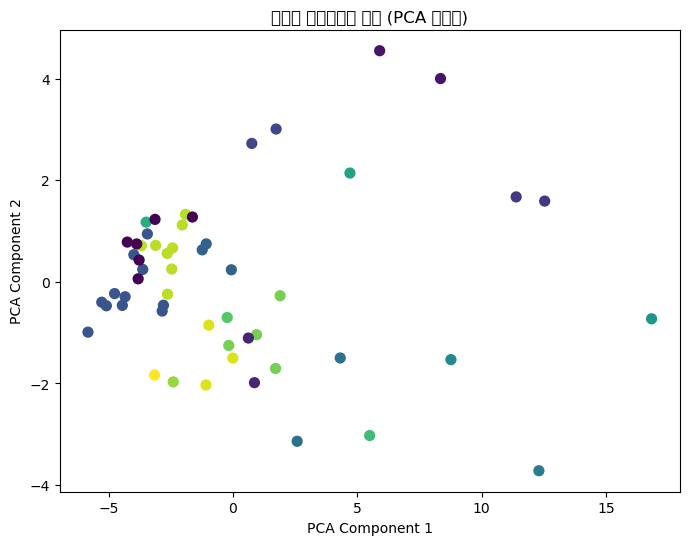

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(sales_pca[:, 0], sales_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("스토어 클러스터링 결과 (PCA 시각화)")
plt.show()